<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

## <div style="text-align: left; background-color:#192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">TABLE OF CONTENTS</div>

* &nbsp; **[IMPORT Libraries](#USED-LIBRARIES)**

* &nbsp; **[Metadata](#METADATA)**

* &nbsp; **[Load and Check Data](#LOAD-AND-CHECK-DATA)**

* &nbsp; **[Data Cleaning](#DATA-CLEANING)**

* &nbsp; **[K-Means Clustering](#EXPLORATORY-DATA-ANALYSIS)**

* &nbsp; **[Product Recommendation](#EXPLORATORY-DATA-ANALYSIS)**



<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">IMPORT LIBRARIES</div>

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">METADATA</div>

(From [Superstore Dataset](https://www.kaggle.com/rohitsahoo/sales-forecasting) Data Card)

* Row ID ========> Unique ID for each row.
* Order ID ======> Unique Order ID for each Customer.
* Order Date ====> Order Date of the product.
* Ship Date =====> Shipping Date of the Product.
* Ship Mode =====> Shipping Mode specified by the Customer.
* Customer ID ===> Unique ID to identify each Customer.
* Customer Name => Name of the Customer.
* Segment =======> The segment where the Customer belongs.
* Country =======> Country of residence of the Customer.
* City ==========> City of residence of of the Customer.
* State =========> State of residence of the Customer.
* Postal Code ===> Postal Code of every Customer.
* Region ========> Region where the Customer belong.
* Product ID ====> Unique ID of the Product.
* Category ======> Category of the product ordered.
* Sub-Category ==> Sub-Category of the product ordered.
* Product Name ==> Name of the Product
* Sales =========> Sales of the Product.

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">LOAD AND CHECK DATA</div>

In [7]:
df = pd.read_csv('Superstore Sales Dataset.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [8]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [9]:
# getting more information from the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [10]:
# checking how many rows and columns in the dataset
df.shape

(9800, 18)

In [11]:
# statistical summary
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [12]:
# printing the column names in the data
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [13]:
# data types of columns
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">DATA CLEANING</div>

In [14]:
# make all data are lowercase and there is no space between letters
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.lower().str.strip()

In [15]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')
df['Postal Code'] = df['Postal Code'].astype(str)

## Missing Data

In [16]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [17]:
df[df['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


In [18]:
df['Postal Code'] = df['Postal Code'].fillna("05408") # 05408 is Postal code for Burlington	Vermont

In [19]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

## Duplicate Data

In [20]:
df.duplicated().sum()

0

In [21]:
df.drop(columns=['Row ID'], inplace=True)

In [22]:
df.duplicated().sum()

1

In [23]:
df[df.duplicated(keep=False)]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
3405,us-2015-150119,2015-04-23,2015-04-27,standard class,lb-16795,laurel beltran,home office,united states,columbus,ohio,43229.0,east,fur-ch-10002965,furniture,chairs,global leather highback executive chair with p...,281.372
3406,us-2015-150119,2015-04-23,2015-04-27,standard class,lb-16795,laurel beltran,home office,united states,columbus,ohio,43229.0,east,fur-ch-10002965,furniture,chairs,global leather highback executive chair with p...,281.372


In [24]:
df = df.drop_duplicates()

## Outliers

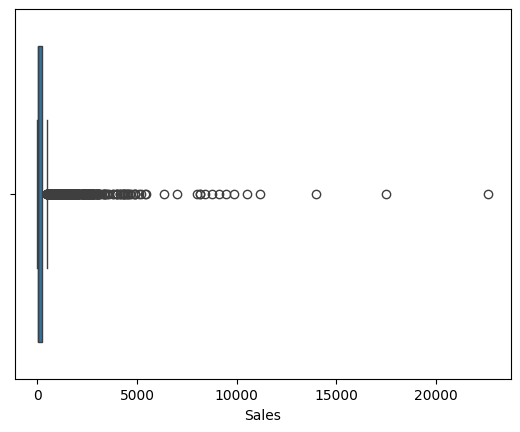

In [25]:
sns.boxplot(x=df['Sales'])
plt.show()

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">Exploratory Data Analysis (EDA)</div>

## Customer Segmentation Analysis

In [26]:
# Set style
sns.set_style("whitegrid")

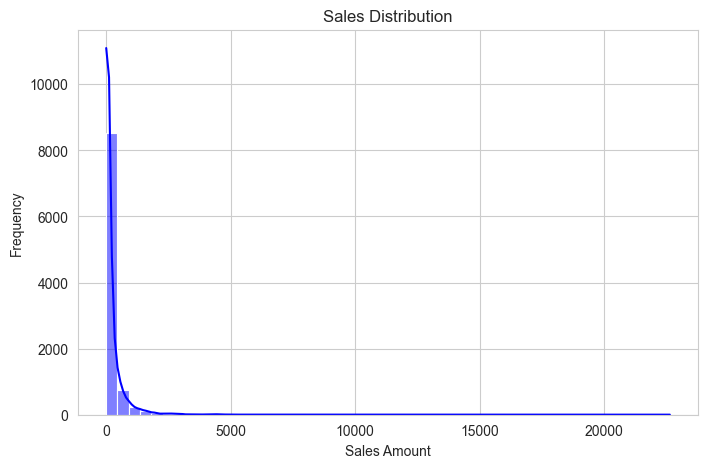

In [27]:
# Sales Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Sales"], bins=50, kde=True, color="blue")
plt.title("Sales Distribution")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.show()

C:\Users\fayza ahmed\AppData\Local\Temp\ipykernel_21568\322230470.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="Blues_r")


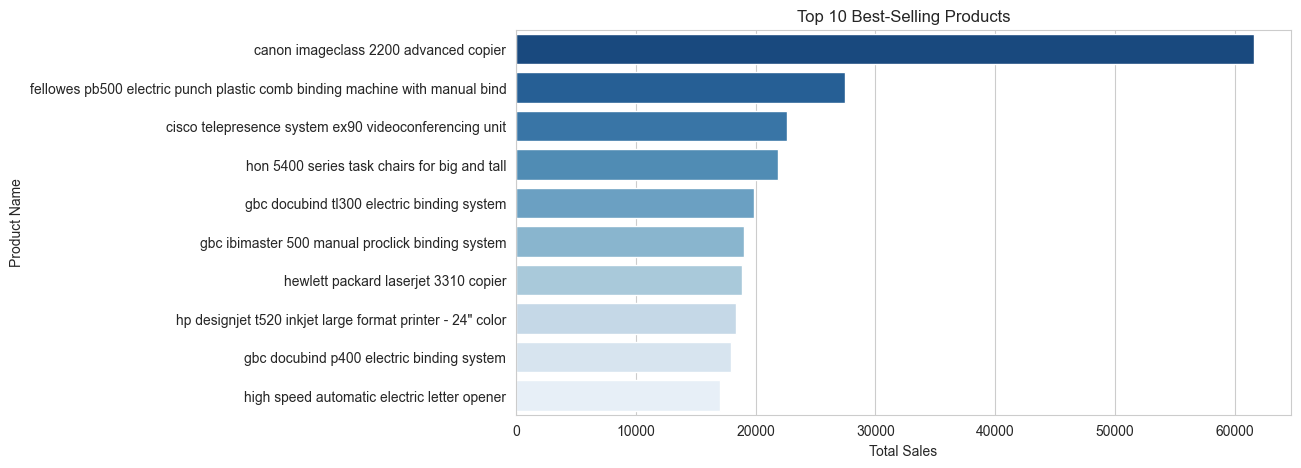

In [28]:
# Top 10 Best-Selling Products
top_products = df.groupby("Product Name")["Sales"].sum().nlargest(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette="Blues_r")
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.show()

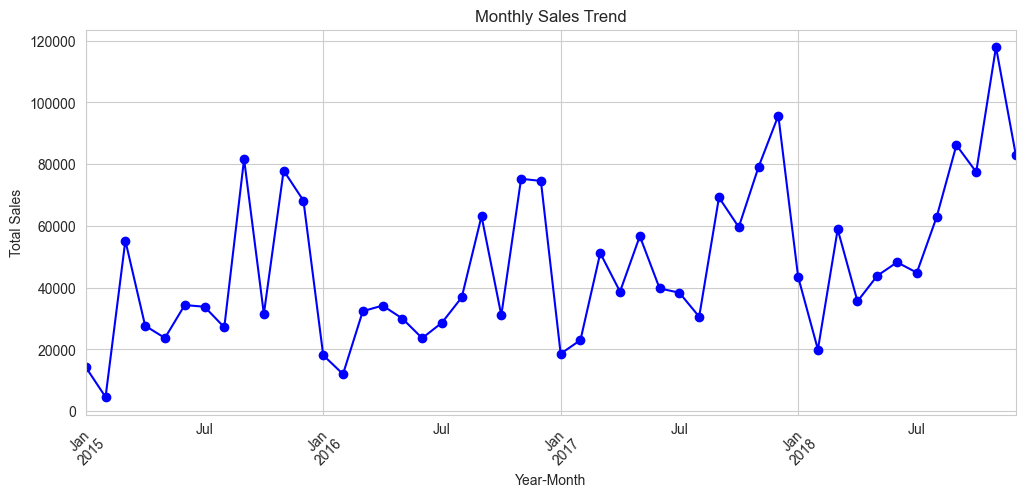

In [29]:
# Sales Trend Over Time
df["Year-Month"] = df["Order Date"].dt.to_period("M")
monthly_sales = df.groupby("Year-Month")["Sales"].sum()

plt.figure(figsize=(12, 5))
monthly_sales.plot(marker="o", color="blue", linestyle="-")
plt.title("Monthly Sales Trend")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

C:\Users\fayza ahmed\AppData\Local\Temp\ipykernel_21568\2207165123.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.groupby("Category")["Sales"].sum().index,


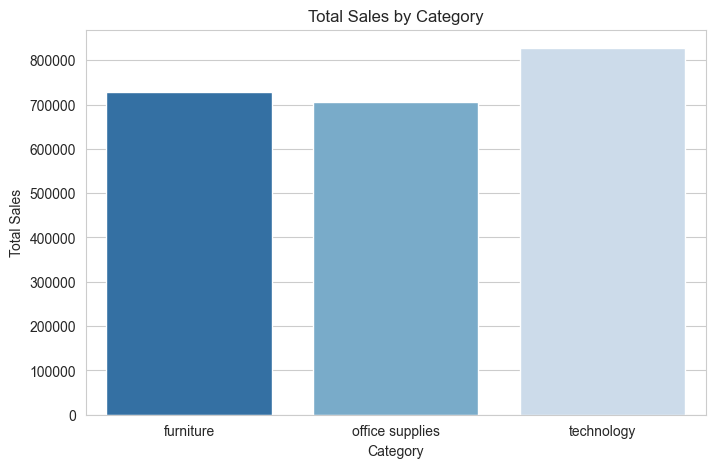

In [30]:
# Sales by Category
plt.figure(figsize=(8, 5))
sns.barplot(x=df.groupby("Category")["Sales"].sum().index,
            y=df.groupby("Category")["Sales"].sum().values,
            palette="Blues_r")
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()

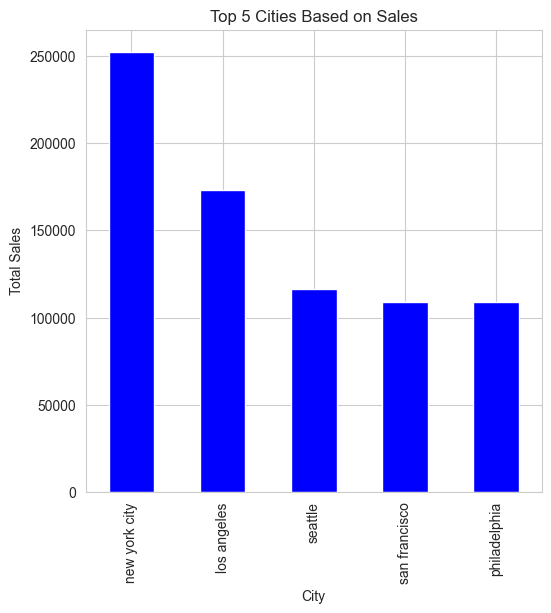

In [31]:
segment_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(20,6))
plt.subplot(1,3,2)
segment_sales.plot(kind='bar',color='blue')
plt.title('Top 5 Cities Based on Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.show()

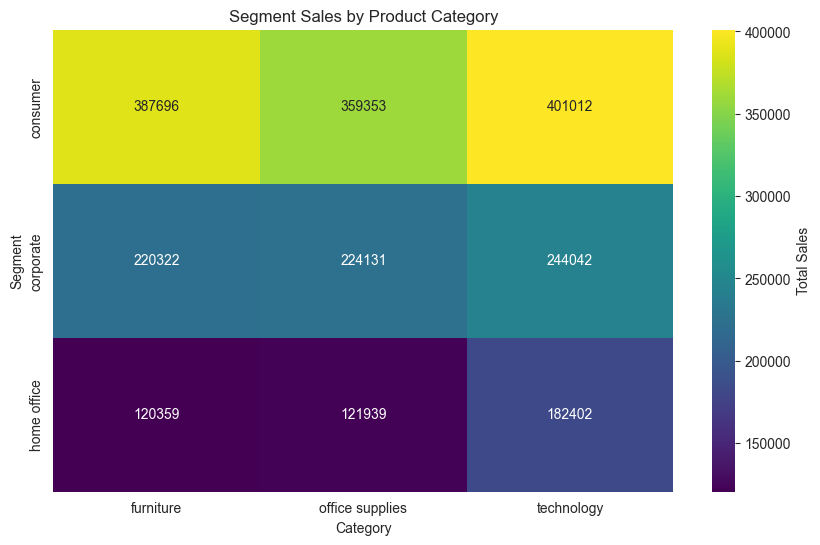

In [32]:
heatmap_data = df.pivot_table(index='Segment', columns='Category', values='Sales', aggfunc='sum')
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.0f', cbar_kws={'label':'Total Sales'})
plt.title("Segment Sales by Product Category")
plt.show()

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

# <div style="text-align: left; background-color:#1192AA; font-family: Trebuchet MS; color: #EEE8A9; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px">Model Building</div>

## K-Means Model

In [33]:
# Groping median Sales per Customer and customer id
customer_sales = df.groupby('Customer ID', as_index=False)['Sales'].median()

In [34]:
# Scaling Sales Data
scaler = MinMaxScaler()
customer_sales['sales_scaled'] = scaler.fit_transform(customer_sales[['Sales']])

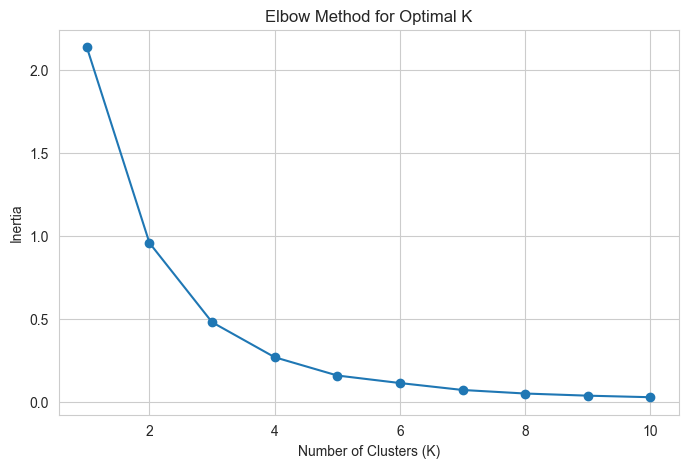

In [35]:
# Find Optimal Number of Clusters using Elbow Method
inertia = []
k_range = range(1, 11)  # Trying different K values from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(customer_sales[['sales_scaled']])
    inertia.append(kmeans.inertia_)

# Plot Elbow Method Graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [36]:
# Apply K-Means Clustering with Optimal K (Choosed based on Elbow Method)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
customer_sales['Cluster'] = kmeans.fit_predict(customer_sales[['sales_scaled']])

In [37]:
# Merge Cluster Labels Back into Original Dataset
df = df.merge(customer_sales[['Customer ID', 'Cluster']], on='Customer ID', how='left')

In [38]:
# Evaluating clustering
silhouette_avg = silhouette_score(customer_sales[['sales_scaled']], customer_sales['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.69


In [39]:
cluster_summary = customer_sales.groupby('Cluster')['Sales'].agg(['count', 'median', 'sum']).sort_values(by='sum')
print(cluster_summary)


         count     median         sum
Cluster                              
1            1  1919.9760   1919.9760
3            4   719.7980   3040.3520
2          150   147.2000  24617.6285
0          638    46.5725  31889.5130


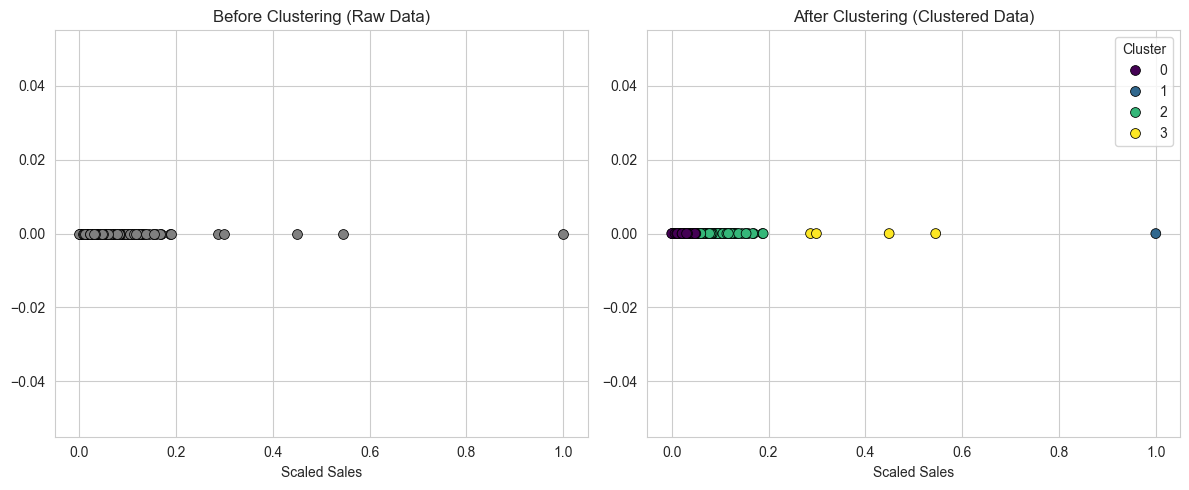

In [40]:
# Create a Figure with Two Subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# **Before Clustering** (Raw Data)
sns.scatterplot(data=customer_sales, x='sales_scaled', y=[0]*len(customer_sales), color='gray', s=50, edgecolor="k", ax=axes[0])
axes[0].set_title("Before Clustering (Raw Data)")
axes[0].set_xlabel("Scaled Sales")
axes[0].set_ylabel("")

# **After Clustering** (Colored by Cluster)
sns.scatterplot(data=customer_sales, x='sales_scaled', y=[0]*len(customer_sales), hue='Cluster', palette='viridis', s=50, edgecolor="k", ax=axes[1])
axes[1].set_title("After Clustering (Clustered Data)")
axes[1].set_xlabel("Scaled Sales")
axes[1].set_ylabel("")
axes[1].legend(title="Cluster")

plt.tight_layout()
plt.show()

In [41]:
df.sample(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year-Month,Cluster
14,us-2016-118983,2016-11-22,2016-11-26,standard class,hp-14815,harold pawlan,home office,united states,fort worth,texas,76106.0,central,off-ap-10002311,office supplies,appliances,holmes replacement filter for hepa air cleaner...,68.810,2016-11,0
5015,ca-2015-153850,2015-11-24,2015-11-29,standard class,th-21100,thea hendricks,consumer,united states,toledo,ohio,43615.0,east,tec-ph-10002584,technology,phones,samsung galaxy s4,1502.376,2015-11,0
2415,ca-2016-146087,2016-07-06,2016-07-11,standard class,pp-18955,paul prost,home office,united states,holyoke,massachusetts,1040.0,east,fur-bo-10002824,furniture,bookcases,bush mission pointe library,301.960,2016-07,2
6191,ca-2018-104927,2018-12-22,2018-12-26,standard class,ag-10330,alex grayson,consumer,united states,houston,texas,77095.0,central,off-pa-10000019,office supplies,paper,xerox 1931,25.920,2018-12,0
6966,ca-2017-157161,2017-07-16,2017-07-20,second class,jd-15895,jonathan doherty,corporate,united states,columbia,south carolina,29203.0,south,off-pa-10001461,office supplies,paper,hp office paper (20lb. and 87 bright),60.120,2017-07,0


# **Recommendation**

In [42]:
def recommend_products(cluster):
    """Provide the top 10 recommended products based on the customer's cluster."""
    # Get the most popular products for the given cluster
    # Grouping by Product ID and calculating the total sales for each product within the cluster
    popular_products_cluster = df[df['Cluster'] == cluster].groupby('Product ID')['Sales'].sum().reset_index()

    # Sort products by sales in descending order and get the top 10
    top_products = popular_products_cluster.sort_values(by=['Sales'], ascending=False).head(10)['Product ID'].tolist()

    # Return top products or a message if no recommendations are available
    return top_products if top_products else ["No recommendations available"]

# Add recommendation column
customer_sales['Recommendation'] = customer_sales['Cluster'].apply(recommend_products)

# Merge recommendations into the original dataframe
df = df.merge(customer_sales[['Customer ID', 'Cluster', 'Recommendation']], on='Customer ID', how='left')

# Display results
print("Recommendations based on clusters:")
print(customer_sales[['Customer ID', 'Cluster', 'Recommendation']].head())

Recommendations based on clusters:
  Customer ID  Cluster                                     Recommendation
0    aa-10315        0  [tec-co-10004722, off-bi-10003527, tec-ma-1000...
1    aa-10375        0  [tec-co-10004722, off-bi-10003527, tec-ma-1000...
2    aa-10480        0  [tec-co-10004722, off-bi-10003527, tec-ma-1000...
3    aa-10645        0  [tec-co-10004722, off-bi-10003527, tec-ma-1000...
4    ab-10015        2  [tec-ma-10000822, tec-co-10001449, fur-ch-1000...


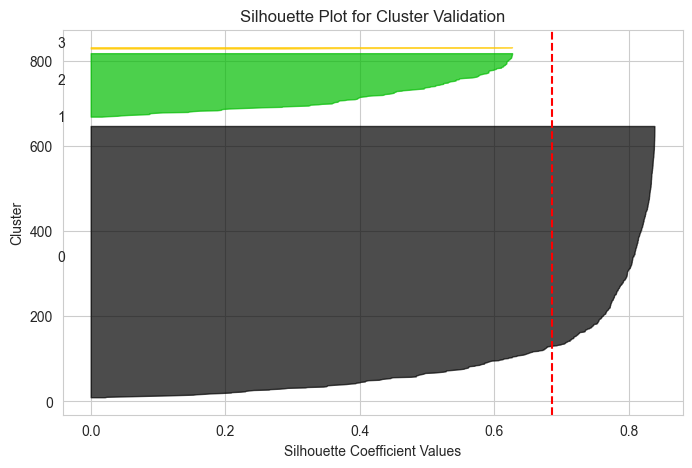

In [43]:
import numpy as np
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

# Compute silhouette scores for each sample
silhouette_values = silhouette_samples(customer_sales[['sales_scaled']], customer_sales['Cluster'])

# Create a silhouette plot
plt.figure(figsize=(8, 5))
y_lower = 10
for i in range(optimal_k):
    cluster_silhouette_values = silhouette_values[customer_sales['Cluster'] == i]
    cluster_silhouette_values.sort()
    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / optimal_k)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # Add space between clusters

plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster")
plt.title("Silhouette Plot for Cluster Validation")
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.show()


<div style="
    background-color: #088299;
    color: #f7e6a2; 
    padding: 10px;
    text-align: center; 
    font-size: 20px; 
    font-weight: bold;
    border-radius: 5px; 
">
    Model saving
</div>


In [48]:
import joblib
import sklearn

In [45]:
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']